<a href="https://colab.research.google.com/github/benasphy/SVM/blob/main/SVM_with_various_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Kernel Accuracy: 0.95
RBF Kernel Accuracy: 1.00


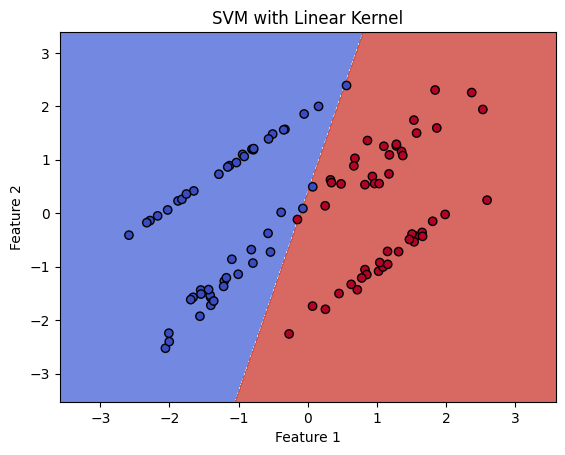

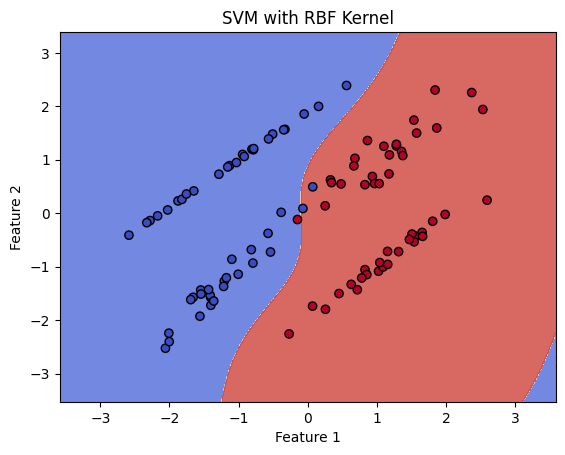

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification

# Generate a synthetic dataset for email spam classification
# Features are simplified for visualization purposes
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model with a linear kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

# Train an SVM model with an RBF kernel
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(X_train, y_train)

# Predict using both models
y_pred_linear = svc_linear.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)

# Evaluate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {accuracy_linear:.2f}")
print(f"RBF Kernel Accuracy: {accuracy_rbf:.2f}")

# Function to visualize the decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize decision boundaries for both kernels
plot_decision_boundary(svc_linear, X, y, title='SVM with Linear Kernel')
plot_decision_boundary(svc_rbf, X, y, title='SVM with RBF Kernel')
